<a href="https://colab.research.google.com/github/RahmanMonty/DATA690-WANG/blob/master/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparison of the wealthiest and poorest median household income nations
##### 1 Why is this issue important: To give an insight on the significance of the difference between a nations over all wealth and the actual wealth of the population mean and to find and determine if such discrepancies/ or not there of; are a common trend among all developed nations.

##### 2 What questions will I try to answer: After identifying the nations to be considered in the analysis. Wealth data from each nation; to include average income, median income, and wealth status ranking to see if there is a similarity. Identifying the correlation (if any) of the difference between mean and median income numbers and wealth ranking.

##### 3 Where will I get the data: data.gov for domestic numbers. A global data wealth book pdf published annually by Credit Suisse Research Institute. 

##### 4 Unit of analysis: Countries

##### 5 Variables/Measures that will be used: Nations median income, mean income, and world ranking. 

##### 6 Techniques: I will use summary statistics and graphical representations.

##### Different Python Libraries that will be used

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns ; sns.set()
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import altair as alt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("data.csv")

In [0]:
df.info

<bound method DataFrame.info of            name  medianHouseholdIncome  medianPerCapitaIncome    pop2019
0    Luxembourg                  52493                  18418    615.729
1        Norway                  51489                  19308   5378.857
2        Sweden                  50514                  18632  10036.379
3     Australia                  46555                  15026  25203.198
4       Denmark                  44360                  18262   5771.876
..          ...                    ...                    ...        ...
119      Rwanda                   1101                    235  12626.950
120  Madagascar                   1013                    205  26969.307
121     Liberia                    781                    118   4937.374
122     Burundi                    673                    129  11530.580
123        Togo                    571                    279   8082.366

[124 rows x 4 columns]>

###### First, a look at random sample from the data is observed

In [0]:
df.sample(10)

,name,medianHouseholdIncome,medianPerCapitaIncome,pop2019
121,Liberia,781,118,4937.374
0,Luxembourg,52493,18418,615.729
5,United States,43585,15480,329064.917
41,Lithuania,12375,4719,2759.627
81,Vietnam,4783,1124,96462.106
67,Mauritania,6679,778,4525.696
73,China,6180,1786,1433783.686
108,Indonesia,2199,541,270625.568
37,Argentina,14432,4109,44780.677
119,Rwanda,1101,235,12626.950


#### The organization of the data starts here
- Determining and setting to a variable which nations have the highest and lowest median per capita income

In [0]:
rich = df.nlargest(10, "medianHouseholdIncome")
rich

,name,medianHouseholdIncome,medianPerCapitaIncome,pop2019
0,Luxembourg,52493,18418,615.729
1,Norway,51489,19308,5378.857
2,Sweden,50514,18632,10036.379
3,Australia,46555,15026,25203.198
4,Denmark,44360,18262,5771.876
5,United States,43585,15480,329064.917
6,Canada,41280,15181,37411.047
7,South Korea,40861,11950,51225.308
8,Kuwait,40854,7487,4207.083
9,Netherlands,38584,14450,17097.130


In [0]:
poor = df.nsmallest(10, "medianHouseholdIncome")
poor

,name,medianHouseholdIncome,medianPerCapitaIncome,pop2019
123,Togo,571,279,8082.366
122,Burundi,673,129,11530.580
121,Liberia,781,118,4937.374
120,Madagascar,1013,205,26969.307
119,Rwanda,1101,235,12626.950
118,Zambia,1501,287,17861.030
117,Benin,1502,237,11801.151
116,Burkina Faso,1530,168,20321.378
115,Uganda,1775,296,44269.594
114,Kenya,1870,402,52573.973


#### Once we have definied the richest and poorest median household income nations ("rich" and "poor") we can then graph them independently to get a more detailed look at their data.

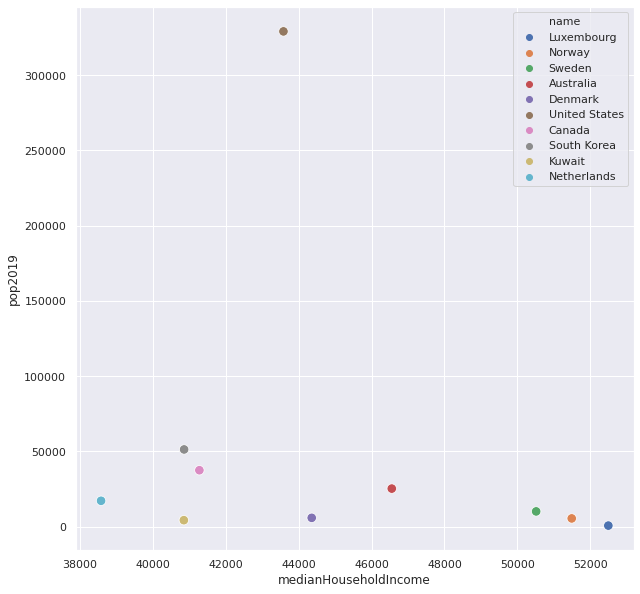

In [0]:
ax = sns.scatterplot(x = "medianHouseholdIncome", y = "pop2019", data = rich, s= 90, hue = "name" )
plt.rcParams["figure.figsize"] = (10,10)
ax

In [0]:
ay = sns.scatterplot(x = "medianHouseholdIncome", y = "pop2019", data = poor, s=90, hue = "name" )
plt.rcParams["figure.figsize"] = (7,7)
ay

In [0]:
source = rich

alt.Chart(rich).mark_bar().encode(
    alt.X("medianHouseholdIncome"),
    y='pop2019',
    color = "name",
    )

alt.Chart(...)

In [0]:
source = poor

alt.Chart(poor).mark_bar().encode(
    alt.X("medianHouseholdIncome"),
    y='pop2019',
    color = "name"
    )

alt.Chart(...)

#### Below are interactive graphs that can be used to show the average median household income of the richest and poorest datasets selected nations.

In [0]:
source = rich
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='medianHouseholdIncome',
    y='pop2019',
    color = "name",
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),).add_selection(brush)

line = alt.Chart().mark_rule(color='red').encode(
    y='mean(medianHouseholdIncome)',
    size=alt.SizeValue(3)).transform_filter(brush)

alt.layer(bars, line, data=source)

alt.LayerChart(...)

In [0]:
source = poor
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='medianHouseholdIncome',
    y='pop2019',
    color = "name",
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),).add_selection(brush)

line = alt.Chart().mark_rule(color='red').encode(
    y='mean(medianHouseholdIncome)',
    size=alt.SizeValue(3)).transform_filter(brush)

alt.layer(bars, line, data=source)

alt.LayerChart(...)

### From the data collected above, no direct correlation can be made between highly populated nations and their median household income to lower populated nations. A country may be highly populated, like the US and have a higher median household income or have a low population like Luxemburg and have a high median household income. One nation worth mentioning, that was in the richest nations category, is Kuwait. Being a relativly wealthy country compared most other nations and having a lower population makes for an easier dispersment of wealth to it's citizens.